In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 径向基函数不同$\gamma$的拟合效果

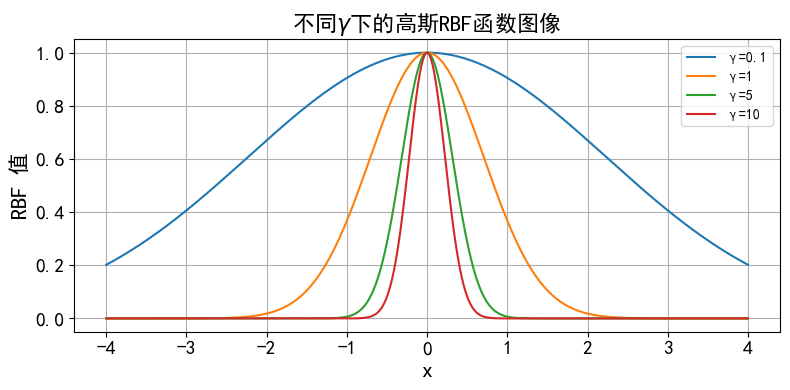

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# 设置全局字体以支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体或其他你系统中已有的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.rcParams['xtick.labelsize'] = 14  # x轴刻度标签
plt.rcParams['ytick.labelsize'] = 14  # y轴刻度标签

# 定义高斯RBF函数
def rbf(x, center, gamma):
    return np.exp(-gamma * (x - center)**2)

# 选择中心点和不同的gamma值
center = 0
gammas = [0.1, 1, 5, 10]  # 不同的gamma值
x_values = np.linspace(-4, 4, 400)  # x轴取值范围

# 绘制不同gamma值的RBF函数图像
plt.figure(figsize=(8, 4))
for gamma in gammas:
    y_values = rbf(x_values, center, gamma)
    plt.plot(x_values, y_values, label=f'γ={gamma}')

# 添加标题和标签
plt.title('不同$\gamma$下的高斯RBF函数图像',fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('RBF 值', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout() 
plt.show()

可视支持向量

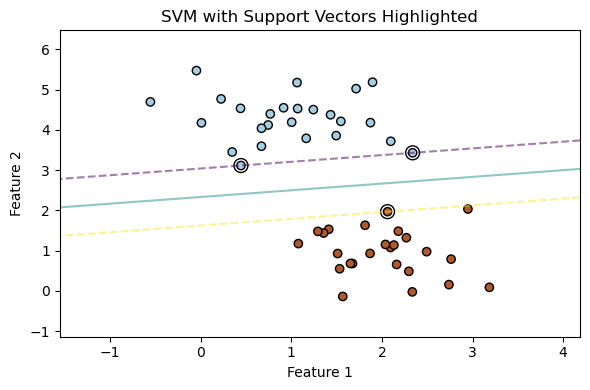

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# 生成模拟数据
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# 创建SVM模型
svm = SVC(kernel='linear', C=100).fit(X, y)

_, ax = plt.subplots(figsize=(6, 4))
# 可视化决策边界和支持向量
disp = DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="auto",
    plot_method="contour",
    xlabel='Feature 1',
    ylabel='Feature 2',
    levels=[-1, 0, 1],
    linestyles=['--', '-', '--'],
    alpha=0.5,
    ax = ax,
)
# 绘制训练数据点
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

# 标记支持向量
support_vectors = svm.support_vectors_
disp.ax_.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                 facecolors='none', edgecolors='k')
plt.title('SVM with Support Vectors Highlighted')
plt.tight_layout()
plt.show()

# 不同$\gamma$值的径向基函数可视乎

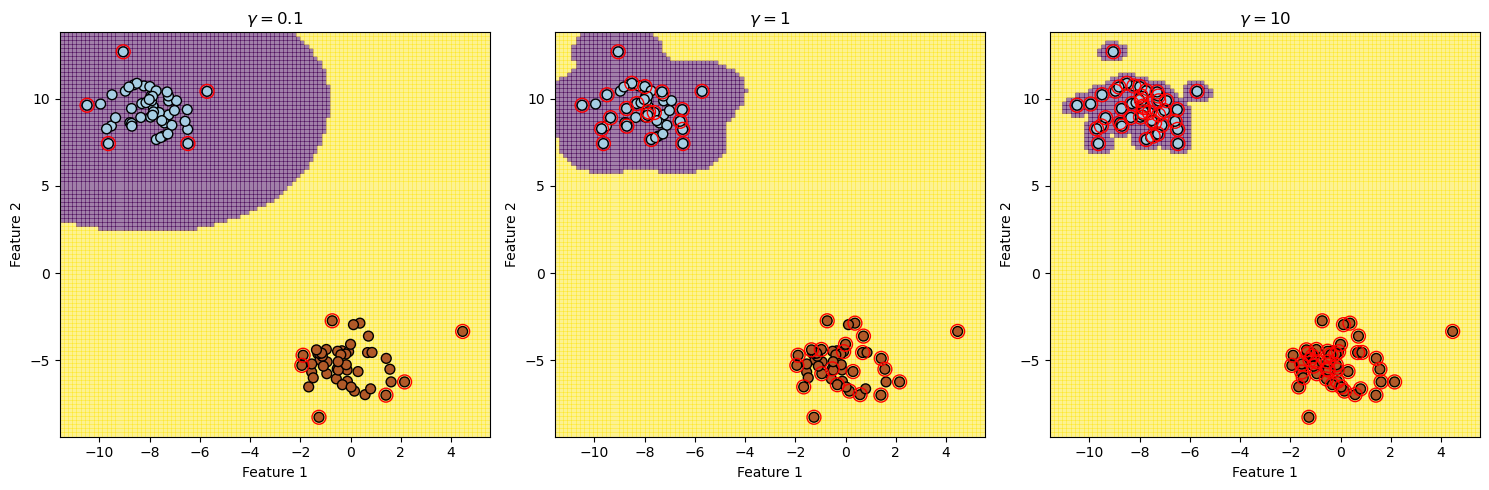

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# 生成模拟数据
X, y = make_blobs(n_samples=100, centers=2, random_state=55)

# 定义不同的 gamma 值
gammas = [0.1, 1, 10]

# 创建一个图形
fig, axes = plt.subplots(1, len(gammas), figsize=(15, 5))

# 遍历每个 gamma 值
for i, gamma in enumerate(gammas):
    # 训练支持向量机模型
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X, y)
    
    # 使用 DecisionBoundaryDisplay 绘制决策边界
    disp = DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='Feature 1',
        ylabel='Feature 2',
        alpha=0.5,
        ax=axes[i],
        shading='auto'
    )
    
    # 绘制训练数据点
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.Paired)
    
    # 显示支持向量
    sv = svm.support_vectors_
    disp.ax_.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='r', s=100, label='Support Vectors')
    
    # 设置子图标题
    disp.ax_.set_title(f'$\gamma = {gamma}$')

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()

# 手写数字实例

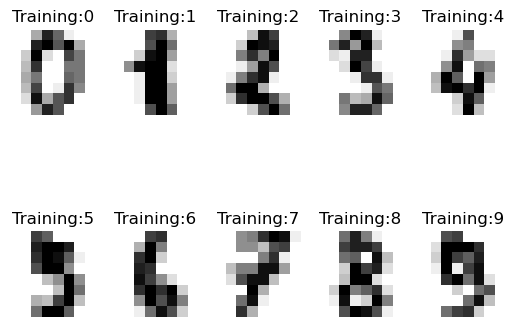

Best parameters found:  {'C': 100, 'gamma': 0.01}
Classification report for classifier SVC(C=100, gamma=0.01):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360




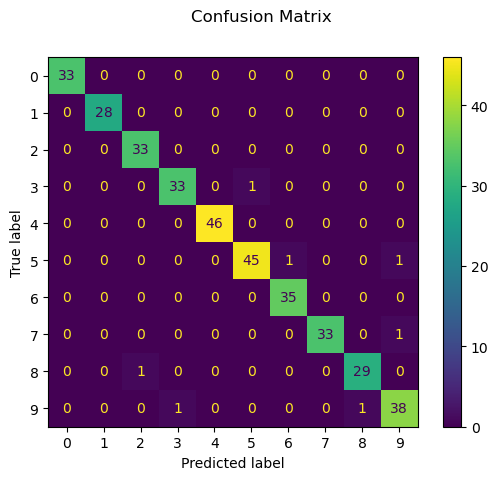

In [7]:
# 导入所需库
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 加载MNIST数据集
digits = datasets.load_digits()
X, y = digits.data, digits.target

# 数据预览
_, axes = plt.subplots(2, 5)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes.ravel(), images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Training:{label}')
plt.show()

# 特征提取与数据划分
X = X.reshape((len(X), -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 模型构建与训练
svc = svm.SVC(kernel='rbf')
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_svc = grid_search.best_estimator_

# 结果分析
y_pred = best_svc.predict(X_test)
print(f"Classification report for classifier {best_svc}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot()
disp.figure_.suptitle("Confusion Matrix")
plt.show()